In [1]:
%matplotlib nbagg
import hyperspy.api as hys
import numpy as np
import tkinter.filedialog as tkf

In [2]:
# 1) prepare EELS data (low loss and core loss)
hl = hys.load(tkf.askopenfilename(), signal_type = "EELS")
ll = hys.load(tkf.askopenfilename(), signal_type = "EELS")
print(hl)
print(ll)

<EELSSpectrum, title: 200kV-200X-0102_1, dimensions: (|2048)>
<EELSSpectrum, title: 200kV-200X-0102, dimensions: (|2048)>


In [3]:
hlc = hl.deepcopy()
llc = ll.deepcopy()

In [4]:
# 2) ZLP align
llc.align_zero_loss_peak(subpixel=True, also_align=[hlc])


Initial ZLP position statistics
-------------------------------
Summary statistics
------------------
mean:	-0.6
std:	0

min:	-0.6
Q1:	-0.6
median:	-0.6
Q3:	-0.6
max:	-0.6


<IPython.core.display.Javascript object>


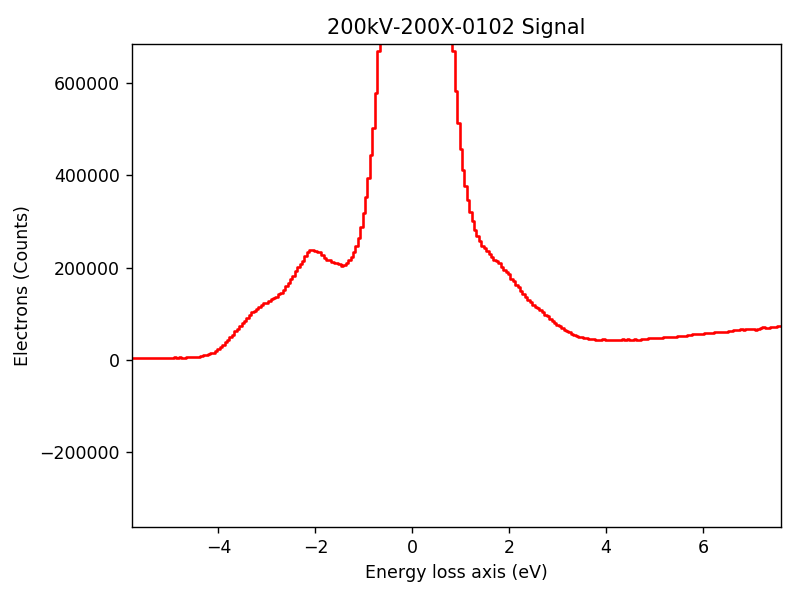

In [6]:
llc.plot()

In [22]:
# 4_1) Fourier ratio deconvolution
ll_deconv_fr = llc.fourier_ratio_deconvolution(llc)

<IPython.core.display.Javascript object>


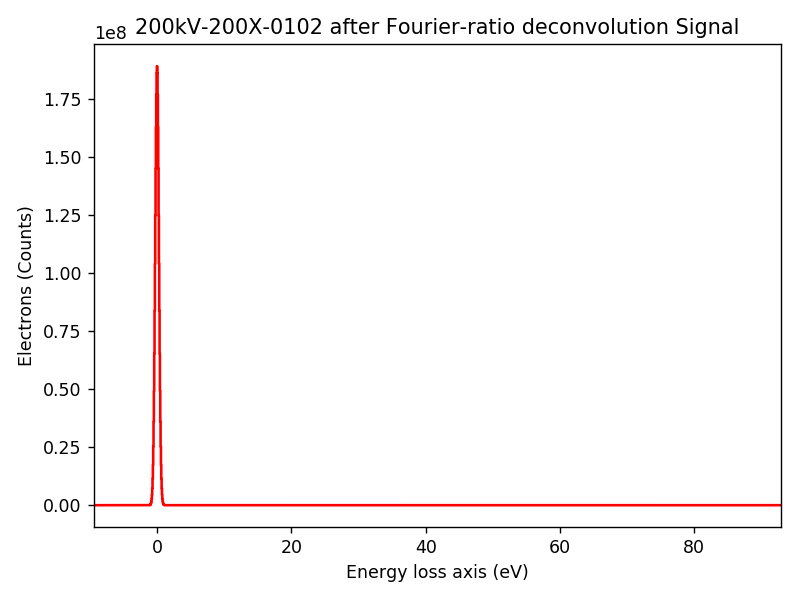

In [23]:
ll_deconv_fr.plot()

In [25]:
# 4_2) Fourier log deconvolution
ll_deconv_fl = llc.fourier_log_deconvolution(llc, add_zlp=True)

<IPython.core.display.Javascript object>


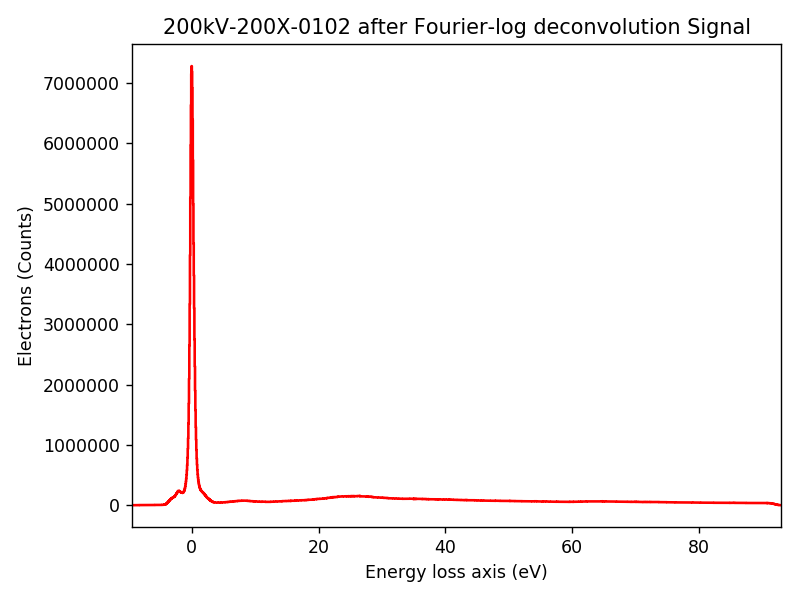

In [27]:
ll_deconv_fl.plot()

In [29]:
# 4_3) Richardson-Lucy deconvolution
ll_deconv_rl = llc.richardson_lucy_deconvolution(llc)

<IPython.core.display.Javascript object>


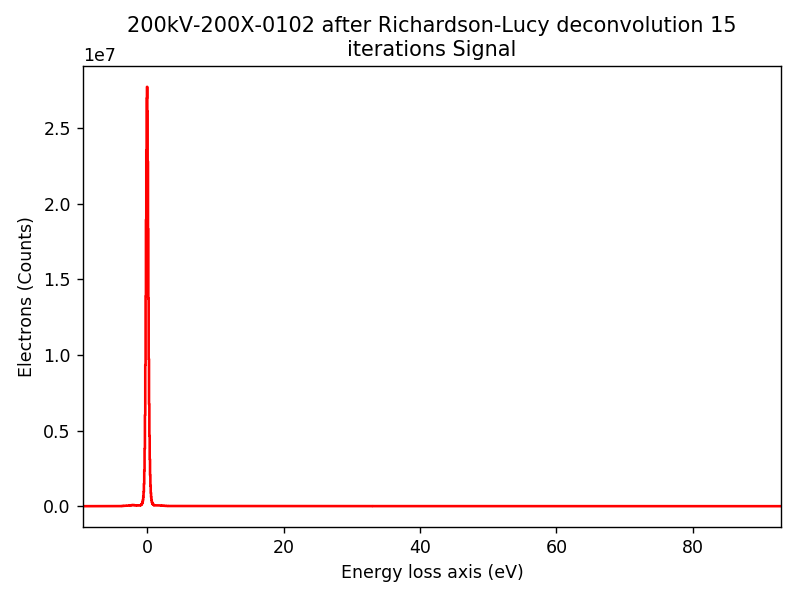

In [30]:
ll_deconv_rl.plot()

In [31]:
ll_deconv_rl.save(tkf.asksaveasfilename())

Overwrite 'D:/documents/documents(temporary)/data/EELS/ll_deconv_richardson_lucy.hdf5' (y/n)?
y


In [ ]:
# 5) add elements
hl_deconv.add_elements(("Co",))

In [ ]:
# 6) create a fitting model
model = hl_deconv.create_model(ll=llc, auto_background=False)
print(model.components)

In [ ]:
# 7) fit the model
model.multifit(kind="smart")

In [ ]:
model.plot()
model.enable_adjust_position()

In [ ]:
print(model.components.Co_L3.onset_energy.value)
print(model.components.Co_L2.onset_energy.value)

In [ ]:
model.enable_fine_structure()
model.multifit(kind="smart")

In [ ]:
model.plot()

In [ ]:
model.components.Co_L3.intensity.bmin = 0.0
model.multifit(fitter="leastsq", kind="smart", bounded=True)

In [ ]:
model.plot()

In [ ]:
roi = hys.roi.SpanROI(left=750, right=800)
model.plot()
roi.add_widget(model, axes=["Energy loss"])

In [ ]:
co_l3 = model.as_signal().isig[roi].integrate1D(axis="Energy loss")
print(co_l3.data)

In [ ]:
roi = hys.roi.SpanROI(left=750, right=800)
model.plot()
roi.add_widget(model, axes=["Energy loss"])

In [ ]:
co_l2 = model.as_signal().isig[roi].integrate1D(axis="Energy loss")
print(co_l2.data)

In [ ]:
wl_ratio = co_l3 / co_l2
print(wl_ratio.data)